# MNIST For Digit Recognizer

A lot of the code is adapted from the tensorflow tutorial, MNIST for ML beginners
* https://www.tensorflow.org/get_started/mnist/beginners

Other References
* https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/



# The Problem

Objects that are intuitive for a human to identify is very hard for a computer such as Pat's computer, Mia, to identify. Examples are digits. It's very easy for us as a human to identify numerical digits 0-9, but the problem comes from the fact that computers only see values as pixels. How is it possible for a computer to identify digits from just RGB pixel values? This project aims to show several ways that we can help a computer identify numerical digits from 0-9.

# The methods we used

* Linear classifier using softmax regression
* CNN

In [2]:
# import libraries and data set
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

FLAGS = None
parser = argparse.ArgumentParser()
parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
FLAGS, unparsed = parser.parse_known_args()

In [3]:
# Import data
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
 

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


In [4]:
# Check dimensions for training data
x_train = mnist.train.images[:,:]
print("Number of training examples: " + str(x_train.shape[0]))
print("Number of features (total number of pixels): " + str(x_train.shape[1]))
y_train = mnist.train.labels[:,:]
print("Number of labels: " + str(y_train.shape[1]))

Number of training examples: 55000
Number of features (total number of pixels): 784
Number of labels: 10


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


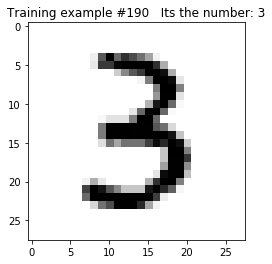

In [7]:
# Display some training data
def show_me_a_digit(index):
    label = y_train[index].argmax(axis=0)
    number = x_train[index].reshape([28,28])
    plt.title('Training example #%d   Digit: %d' %(index,label))
    plt.imshow(number, cmap=plt.get_cmap('gray_r'))
    plt.show()

show_me_a_digit(190)

In [5]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [6]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

In [7]:
# The cost function for our model
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [8]:
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [23]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

0.9134
